In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import variance
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Foram realizados todos os imports necessários para a realização do projeto


pandas - gerenciamento de datasets


seaborn - plotagem de gráficos


matplotlib.pyplot - plotagem de gráficos


statistics e scipy - métricas estatísticas


sklearn - todas as métricas de machine learning necessárias para esse projeto


In [262]:
data = pd.read_csv("winequality-red.csv")

Lendo o arquivo csv utilizando o pandas

Visualizando o dataset

In [263]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Visualizando as estatísticas descritivas do dataset

In [264]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Conferindo se algum valor do dataset é nulo

In [265]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Resultado: não, todos os dados são íntegros

# Analisando os dados de cada coluna estatisticamente,
buscando valores considerados outliers ou valores que não condizem com a maioria restante

O for itera sobre as colunas e plota um gráfico de violino para cada uma

O gráfico de violino nada mais é do que um gráfico de boxplot com densidade, ou seja, mais complexo

A fim de encontrar possíveis outliers!

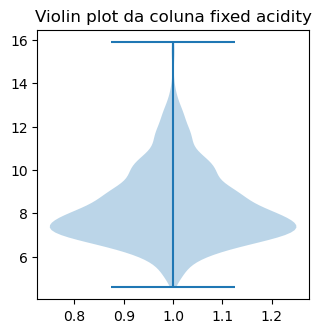

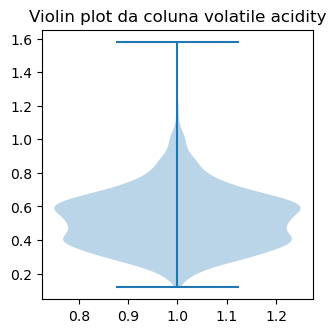

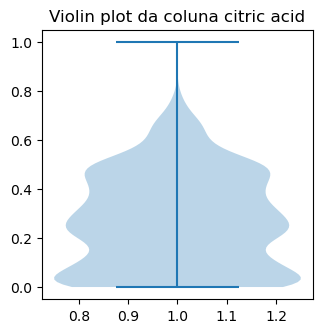

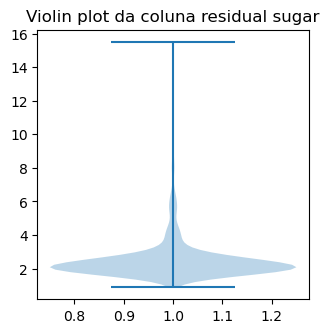

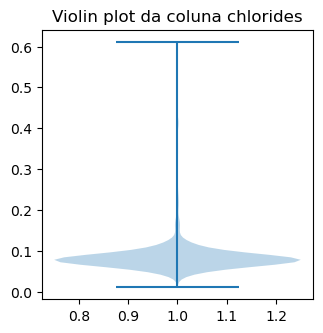

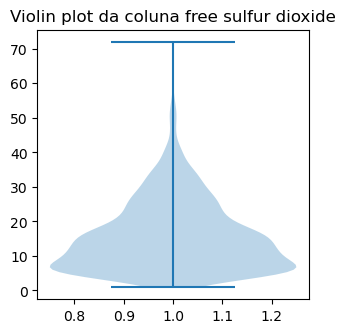

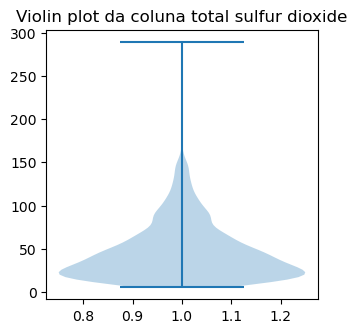

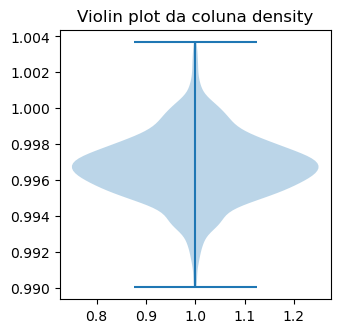

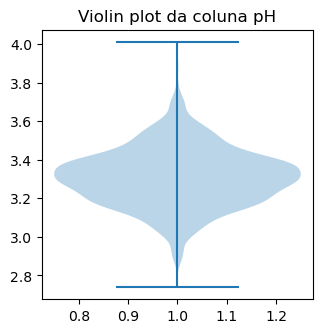

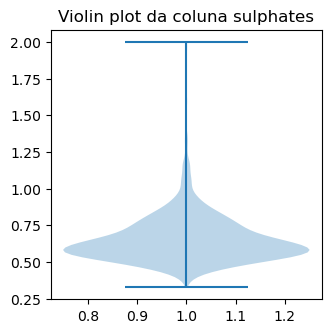

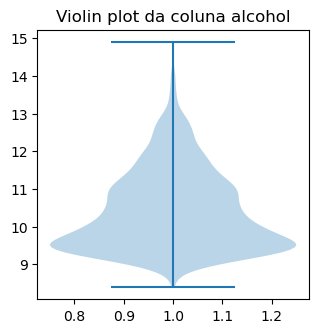

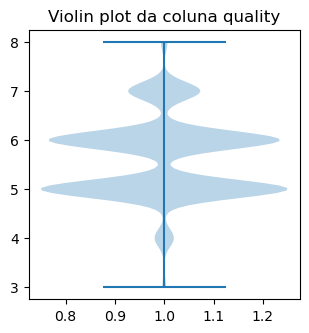

In [266]:
for i in data.columns:
    plt.figure(figsize=(3.5, 3.5))
    plt.title(f"Violin plot da coluna {i}")
    plt.violinplot(data[i])
    plt.show()

Printando a média e a mediana de cada coluna do dataset

# Printando as médias e medianas das colunas

Assim, se a média se diferenciar muito da mediana, há a possível existência de outliers

In [267]:
for i in data.columns:
    print(f"Coluna {i} -- média: {data[i].mean()} -- mediana: {data[i].median()}")

Coluna fixed acidity -- média: 8.31963727329581 -- mediana: 7.9
Coluna volatile acidity -- média: 0.5278205128205128 -- mediana: 0.52
Coluna citric acid -- média: 0.2709756097560976 -- mediana: 0.26
Coluna residual sugar -- média: 2.53880550343965 -- mediana: 2.2
Coluna chlorides -- média: 0.08746654158849279 -- mediana: 0.079
Coluna free sulfur dioxide -- média: 15.874921826141339 -- mediana: 14.0
Coluna total sulfur dioxide -- média: 46.46779237023139 -- mediana: 38.0
Coluna density -- média: 0.9967466791744841 -- mediana: 0.99675
Coluna pH -- média: 3.3111131957473416 -- mediana: 3.31
Coluna sulphates -- média: 0.6581488430268917 -- mediana: 0.62
Coluna alcohol -- média: 10.422983114446529 -- mediana: 10.2
Coluna quality -- média: 5.6360225140712945 -- mediana: 6.0


Tudo normal, médias e medianas condizentes

# Kdeplot X Violin plot

Comparando o violin plot com o kdeplot, que é um histograma de linhas contínuas

Foi escolhido o kdeplot para melhor visualização e entendimento

Se observar, o kdeplot girado lateralmente condiz com os níveis de densidade do violinplot, garantindo a assertividade e integridade dos dados

Os subplots servem apenas pra guiar e colocar os dois gráficos na mesma linha

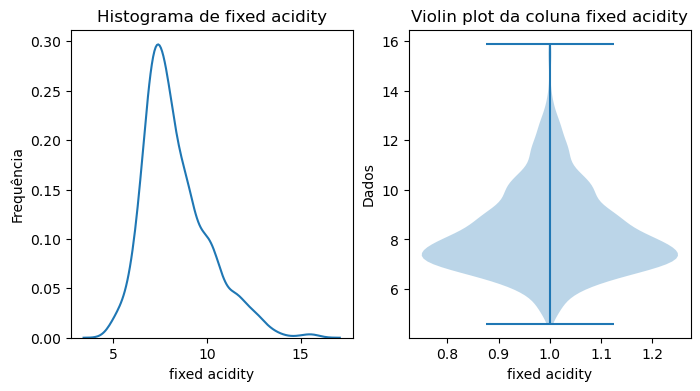

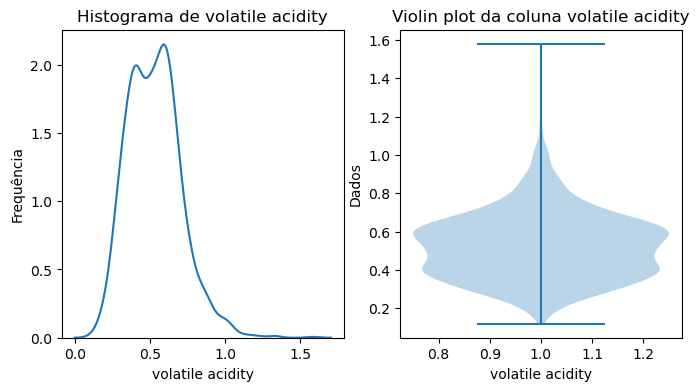

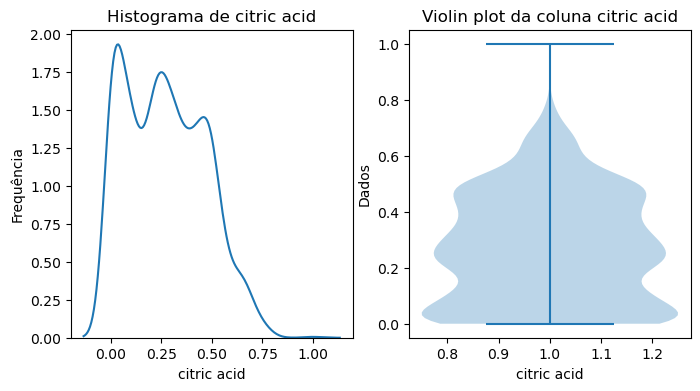

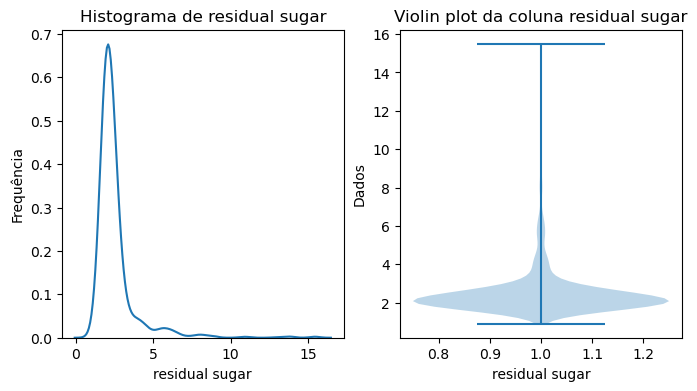

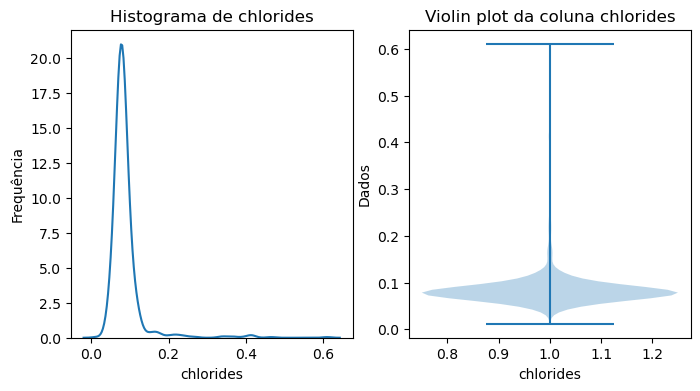

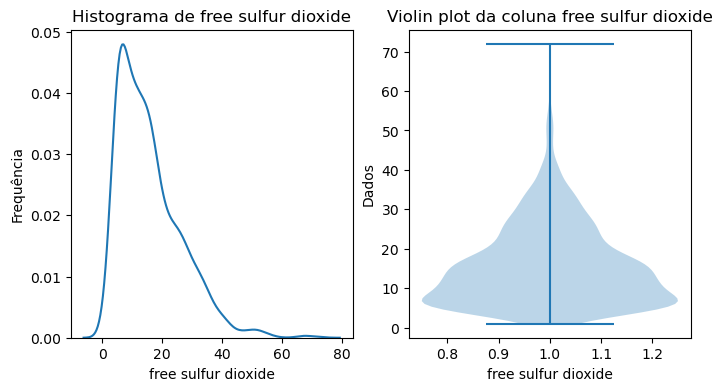

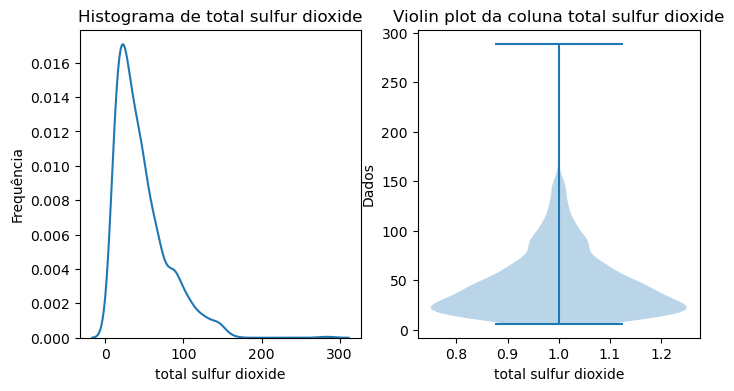

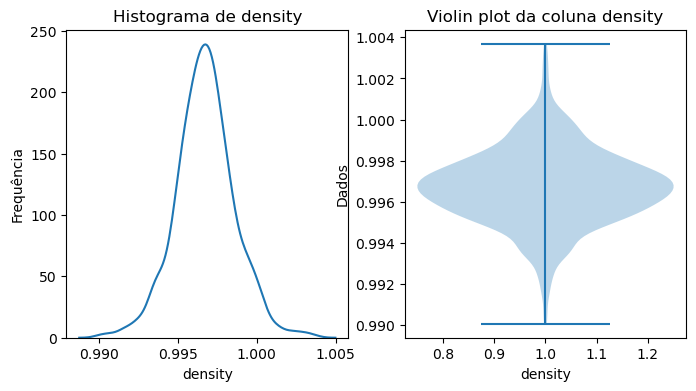

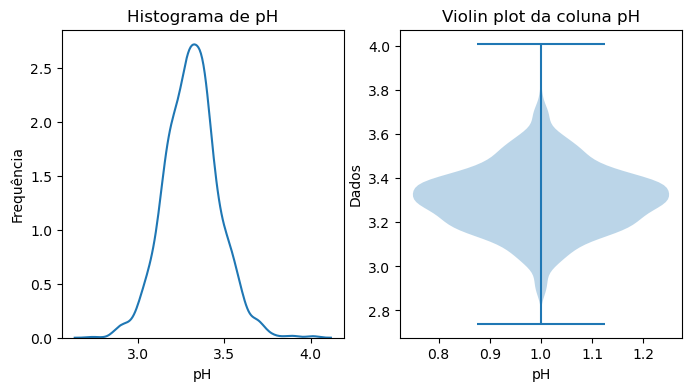

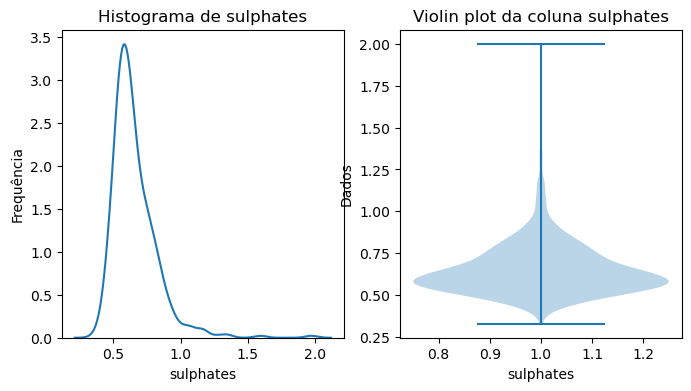

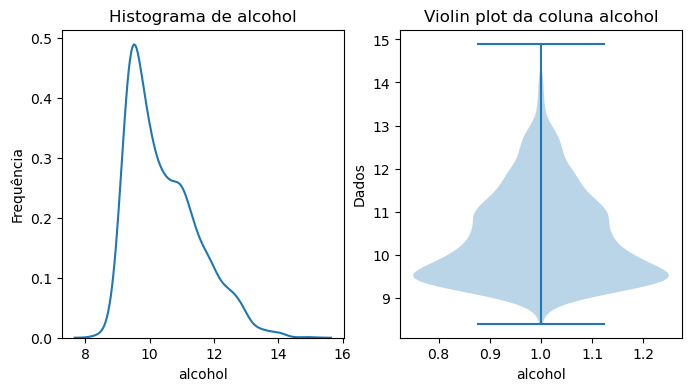

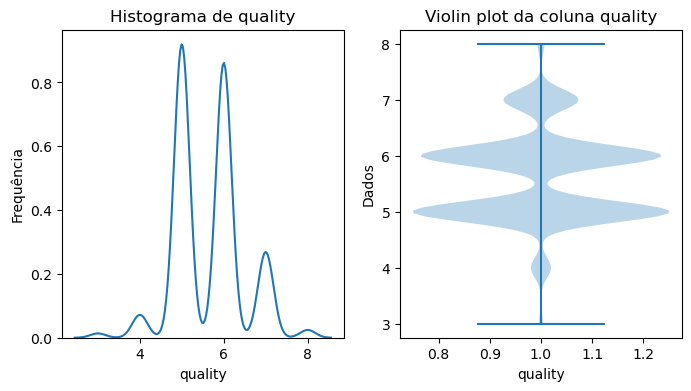

In [268]:
for i in data.columns:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        sns.kdeplot(data[i])
        plt.title(f"Histograma de {i}")
        plt.xlabel(i)
        plt.ylabel("Frequência")
        
        plt.subplot(1, 2, 2)
        plt.violinplot(data[i])
        plt.title(f"Violin plot da coluna {i}")
        plt.ylabel("Dados")
        plt.xlabel(i)

        plt.show()

In [269]:
corr_FA_pH = data['fixed acidity'].corr(data['pH'])
corr_FA_pH

corr_VA_SO2 = data['volatile acidity'].corr(data['total sulfur dioxide'])
corr_VA_SO2

corr_sulphate_SO2 = data['sulphates'].corr(data['total sulfur dioxide'])
corr_sulphate_SO2

corr_sulphate_VA = data['sulphates'].corr(data['volatile acidity'])
corr_sulphate_VA

corr_sulphate_FA = data['sulphates'].corr(data['fixed acidity'])
corr_sulphate_FA


print(f'acidez fixa e ph: {corr_FA_pH}')
print(f'acidez volatil e total de dioxido de enxofre: {corr_VA_SO2}')
print(f'sulfatos e total de dioxido de enxofre: {corr_sulphate_SO2}')
print(f'sulfatos e acidez volatil: {corr_sulphate_VA}')
print(f'sulfatos e acidez fixa: {corr_sulphate_FA}')

acidez fixa e ph: -0.6829781945685315
acidez volatil e total de dioxido de enxofre: 0.07647000482092828
sulfatos e total de dioxido de enxofre: 0.04294683623953825
sulfatos e acidez volatil: -0.26098668528328967
sulfatos e acidez fixa: 0.18300566393215353


# Analisando a variabilidade e distribuição do dataset

A variabilidade entrega a uniformização do dataset, que pode ser importante caso alguma métrica futura gere algum resultado alterado

In [270]:
for i in data.columns:
    print(f"Coluna {i} - STD: {data[i].std()}")
    print(f"Coluna {i} - Variance: {variance(data[i])}")
    print(f"Coluna {i} - Coefficient of variation: {(data[i].std()/data[i].mean())*100}")
    print(" "*20)

Coluna fixed acidity - STD: 1.7410963181277006
Coluna fixed acidity - Variance: 3.031416388997817
Coluna fixed acidity - Coefficient of variation: 20.927550816623146
                    
Coluna volatile acidity - STD: 0.17905970415353498
Coluna volatile acidity - Variance: 0.03206237765155162
Coluna volatile acidity - Coefficient of variation: 33.92435492828693
                    
Coluna citric acid - STD: 0.19480113740531785
Coluna citric acid - Variance: 0.03794748313440581
Coluna citric acid - Coefficient of variation: 71.88880858342063
                    
Coluna residual sugar - STD: 1.4099280595072805
Coluna residual sugar - Variance: 1.9878971329859636
Coluna residual sugar - Coefficient of variation: 55.535095445360724
                    
Coluna chlorides - STD: 0.047065302010090154
Coluna chlorides - Variance: 0.0022151426533009912
Coluna chlorides - Coefficient of variation: 53.809492355968636
                    
Coluna free sulfur dioxide - STD: 10.46015696980973
Coluna f

O desvio padrão é considerado baixo, assim como o coeficiente de variação na maioria dos casos

A variância também foi considerada baixa para este caso

# Analisando a correlação entre as colunas (variáveis) do dataset

In [292]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Utilizando a biblioteca Seaborn, foi possível gerar um mapa de calor, onde nas regiões mais escuras, a correlação positiva é alta

Sendo assim, o contrário é afirmativo, as regiões menos escuras, indicam correlação negativa alta

<Axes: >

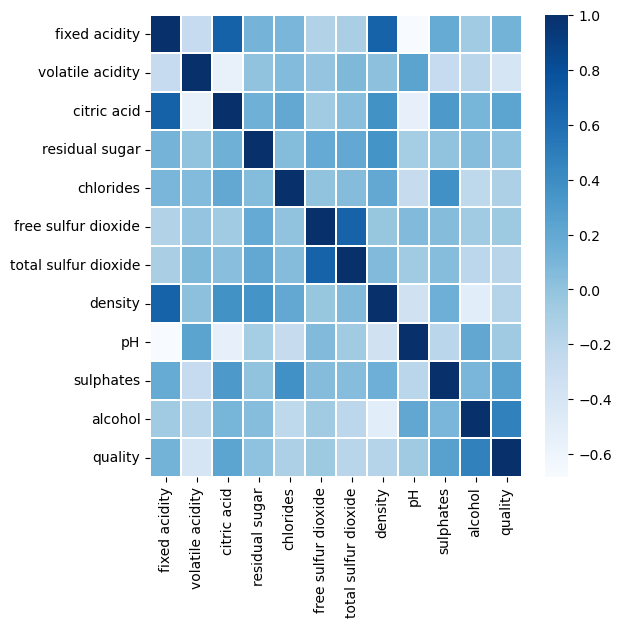

In [271]:
correlation = data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cmap='Blues', linewidths=0.1)

# Gerando gráficos para analisar a distribuição dos dados

Para as colunas de correlação, negativa ou positiva, alta!

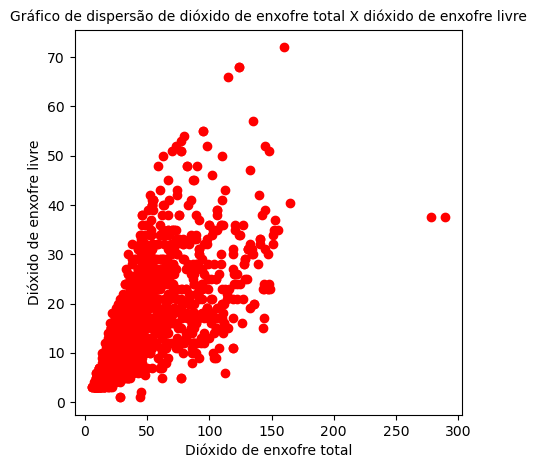

In [272]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de dióxido de enxofre total X dióxido de enxofre livre", fontsize=10)
plt.xlabel('Dióxido de enxofre total')
plt.ylabel('Dióxido de enxofre livre')
plt.scatter(data['total sulfur dioxide'], data['free sulfur dioxide'], color='red')
plt.show()


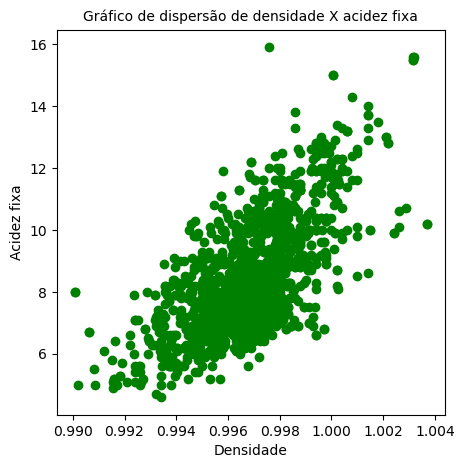

In [273]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de densidade X acidez fixa", fontsize=10)
plt.xlabel('Densidade')
plt.ylabel('Acidez fixa')
plt.scatter(data['density'], data['fixed acidity'], color='green')
plt.show()

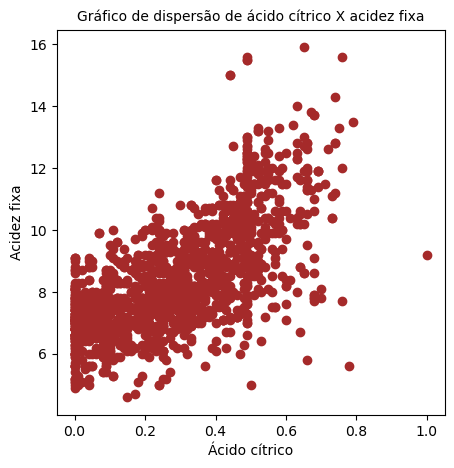

In [274]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de ácido cítrico X acidez fixa", fontsize=10)
plt.xlabel('Ácido cítrico')
plt.ylabel('Acidez fixa')
plt.scatter(data['citric acid'], data['fixed acidity'], color='brown')
plt.show()

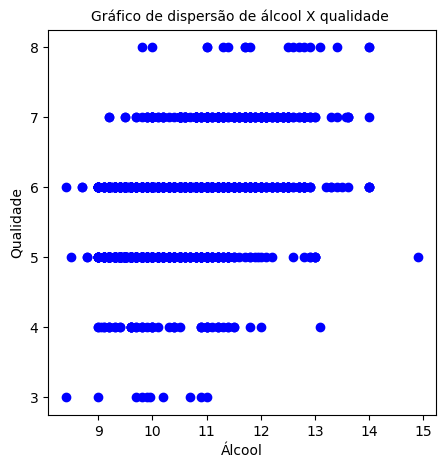

In [275]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de álcool X qualidade ", fontsize=10)
plt.xlabel('Álcool')
plt.ylabel('Qualidade')
plt.scatter(data['alcohol'], data['quality'], color='blue')
plt.show()

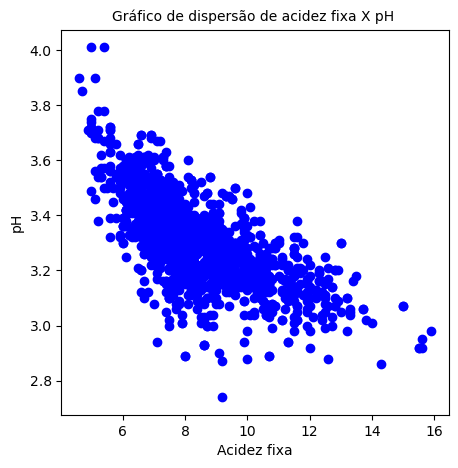

In [276]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de acidez fixa X pH ", fontsize=10)
plt.xlabel('Acidez fixa')
plt.ylabel('pH')
plt.scatter(data['fixed acidity'], data['pH'], color='blue')
plt.show()

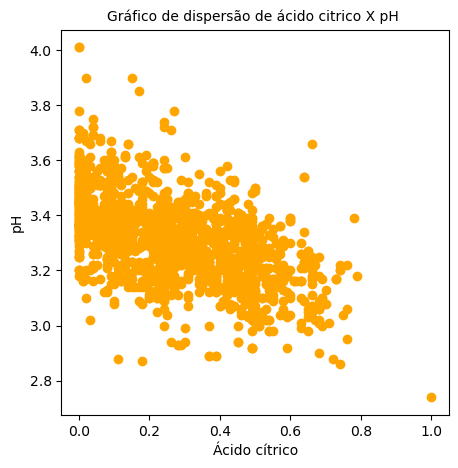

In [277]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de ácido citrico X pH ", fontsize=10)
plt.xlabel('Ácido cítrico')
plt.ylabel('pH')
plt.scatter(data['citric acid'], data['pH'], color='orange')
plt.show()

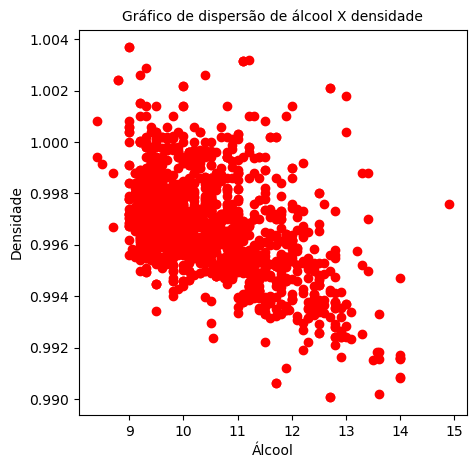

In [278]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de álcool X densidade", fontsize=10)
plt.xlabel('Álcool')
plt.ylabel('Densidade')
plt.scatter(data['alcohol'], data['density'], color='red')
plt.show()

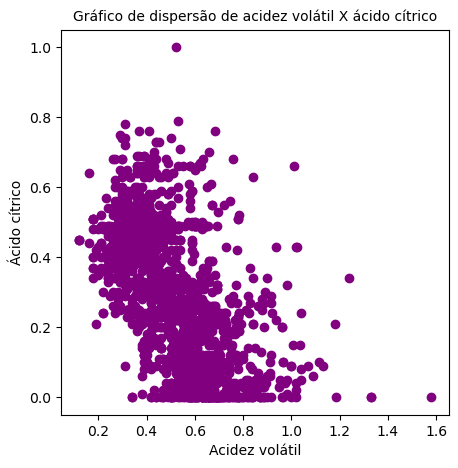

In [279]:
plt.figure(figsize=(5,5))
plt.title("Gráfico de dispersão de acidez volátil X ácido cítrico", fontsize=10)
plt.xlabel('Acidez volátil')
plt.ylabel('Ácido cítrico')
plt.scatter(data['volatile acidity'], data['citric acid'], color='purple')
plt.show()

# Criação da função que realizará os testes de hipótese

**Valor p:** É a chance de que os resultados que foram apresentados acontecessem por acaso. Se for baixo, significa que o resultado não aconteceu por sorte, foi estatisticamente influenciado.

**Graus de liberdade:** É o número de opções que temos para fazer os cálculos.

**Chi²:** Serve para ver se as contagens que foram observadas são diferentes do que era esperado.

**Frequências esperadas:** São os números que deveriam aparecer se tudo estivesse normal.

Se o **valor p** for menor que o nível de significância (0.05), a hipótese nula é rejeitada

In [280]:
#Criação de uma função para criação de testes de hipótese
def testes_de_hipotese(coluna1, coluna2):
    #Criação da tabela de contingência para juntar os dois datasets
    tabela_cont = pd.crosstab(coluna1, coluna2)
    #Recebendo as informações a partir do stats da biblioteca scipy
    #chi2 - qui-quadrado
    #p - valor p
    #graus_lib - graus de liberdade
    #df_esperado - dados esperados em comparação com os reais
    chi2, p, graus_lib, df_esperado = stats.chi2_contingency(tabela_cont)

    #Printando os valores
    print(f'Chi-square: {chi2}')
    print(f'Valor p: {p}')
    print(f'Graus de liberdade: {graus_lib}')
    print('Frequências:')
    #Transformando o array de valores esperados em um dataset para melhor visualização
    df_esperado = pd.DataFrame(df_esperado)
    print(df_esperado)
    
    #Analisando se a hipótese nula irá ser rejeitada ou não
    if p < 0.05:
        print(f'Por conta do valor p ({p}), a hipótese nula foi rejeitada')
    else:
        print(f'Por conta do valor p ({p}), a hipótese nula não foi rejeitada')


In [281]:
testes_de_hipotese(data['total sulfur dioxide'], data['free sulfur dioxide'])
testes_de_hipotese(data['density'], data['fixed acidity'])
testes_de_hipotese(data['citric acid'], data['fixed acidity'])
testes_de_hipotese(data['alcohol'], data['quality'])

Chi-square: 24045.523204621386
Valor p: 0.0
Graus de liberdade: 8437
Frequências:
           0         1         2         3         4         5         6   \
0    0.005629  0.001876  0.091932  0.076923  0.195122  0.001876  0.258912   
1    0.007505  0.002502  0.122577  0.102564  0.260163  0.002502  0.345216   
2    0.026266  0.008755  0.429018  0.358974  0.910569  0.008755  1.208255   
3    0.026266  0.008755  0.429018  0.358974  0.910569  0.008755  1.208255   
4    0.050657  0.016886  0.827392  0.692308  1.756098  0.016886  2.330206   
..        ...       ...       ...       ...       ...       ...       ...   
139  0.001876  0.000625  0.030644  0.025641  0.065041  0.000625  0.086304   
140  0.001876  0.000625  0.030644  0.025641  0.065041  0.000625  0.086304   
141  0.001876  0.000625  0.030644  0.025641  0.065041  0.000625  0.086304   
142  0.001876  0.000625  0.030644  0.025641  0.065041  0.000625  0.086304   
143  0.001876  0.000625  0.030644  0.025641  0.065041  0.000625  0.0863

In [282]:
testes_de_hipotese(data['fixed acidity'], data['pH'])
testes_de_hipotese(data['citric acid'], data['pH'])
testes_de_hipotese(data['alcohol'], data['density'])
testes_de_hipotese(data['volatile acidity'], data['citric acid'])

Chi-square: 20246.018224335243
Valor p: 0.0
Graus de liberdade: 8360
Frequências:
          0         1         2         3         4         5         6   \
0   0.000625  0.000625  0.000625  0.001251  0.002502  0.000625  0.002502   
1   0.000625  0.000625  0.000625  0.001251  0.002502  0.000625  0.002502   
2   0.000625  0.000625  0.000625  0.001251  0.002502  0.000625  0.002502   
3   0.003752  0.003752  0.003752  0.007505  0.015009  0.003752  0.015009   
4   0.002502  0.002502  0.002502  0.005003  0.010006  0.002502  0.010006   
..       ...       ...       ...       ...       ...       ...       ...   
91  0.000625  0.000625  0.000625  0.001251  0.002502  0.000625  0.002502   
92  0.001251  0.001251  0.001251  0.002502  0.005003  0.001251  0.005003   
93  0.001251  0.001251  0.001251  0.002502  0.005003  0.001251  0.005003   
94  0.001251  0.001251  0.001251  0.002502  0.005003  0.001251  0.005003   
95  0.000625  0.000625  0.000625  0.001251  0.002502  0.000625  0.002502   

     

Chi-square: 12933.343837275663
Valor p: 4.639090972349008e-28
Graus de liberdade: 11218
Frequências:
           0         1         2         3         4         5         6   \
0    0.247655  0.061914  0.093809  0.056285  0.054409  0.037523  0.045028   
1    0.165103  0.041276  0.062539  0.037523  0.036273  0.025016  0.030019   
2    0.825516  0.206379  0.312695  0.187617  0.181363  0.125078  0.150094   
3    0.165103  0.041276  0.062539  0.037523  0.036273  0.025016  0.030019   
4    0.247655  0.061914  0.093809  0.056285  0.054409  0.037523  0.045028   
..        ...       ...       ...       ...       ...       ...       ...   
138  0.082552  0.020638  0.031270  0.018762  0.018136  0.012508  0.015009   
139  0.082552  0.020638  0.031270  0.018762  0.018136  0.012508  0.015009   
140  0.082552  0.020638  0.031270  0.018762  0.018136  0.012508  0.015009   
141  0.165103  0.041276  0.062539  0.037523  0.036273  0.025016  0.030019   
142  0.082552  0.020638  0.031270  0.018762  0.01813

# Resultado: 

**Todas** as hipóteses nulas foram rejeitadas, afirmando as influências previstas pela análise de correlação anterior!

# *Machine Learning*

Criação de quatro modelos de machine learning, com classificadores diferentes

In [283]:
#1 - Regressão linear
def reg_lin(categorics, targets):
    X_train, X_test, y_train, y_test = train_test_split(categorics, targets, test_size=0.3, random_state=42)
    classifier = LinearRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    predict = classifier.predict(X_test)
    predict_final = predict.mean()
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    print(f"Score do modelo: {score}")
    print(f"Predict do modelo: {predict}")
    print(f"Predict médio do modelo {predict_final}")
    print(f"Erro médio absoluto: {mae}")
    print(f"Erro quadrático médio: {mse}")
    
    plt.figure(figsize=(5, 3))
    plt.title("Regressão Linear")
    plt.scatter(y_test, predict, alpha=0.2, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=3)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(f'Dispersão: Previsões vs. Valores Reais\nMSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.show()
    
#2 - Classificação (Regressão logística)
def classification(categorics, targets):
    X_train, X_test, y_train, y_test = train_test_split(categorics, targets, test_size=0.3, random_state=42)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    predict = classifier.predict(X_test)
    predict_final = predict.mean()
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    print(f"Score do modelo: {score}")
    print(f"Predict do modelo: {predict}")
    print(f"Predict médio do modelo {predict_final}")
    print(f"Erro médio absoluto: {mae}")
    print(f"Erro quadrático médio: {mse}")
    
    plt.figure(figsize=(5, 3))
    plt.title("Classificação")
    plt.scatter(y_test, predict, alpha=0.2, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=3)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(f'Dispersão: Previsões vs. Valores Reais\nMSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.show()
    
    cm = confusion_matrix(y_test, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão classification')
    plt.show()
    
#3 - Random Forest
def random_forest(categorics, targets):
    X_train, X_test, y_train, y_test = train_test_split(categorics, targets, test_size=0.3, random_state=42)
    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    predict = classifier.predict(X_test)
    predict_final = predict.mean()
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    print(f"Score do modelo: {score}")
    print(f"Predict do modelo: {predict}")
    print(f"Predict médio do modelo {predict_final}")
    print(f"Erro médio absoluto: {mae}")
    print(f"Erro quadrático médio: {mse}")
    
    plt.figure(figsize=(3, 3))
    plt.title("Random Forest")
    plt.scatter(y_test, predict, alpha=0.2, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=3)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(f'Dispersão: Previsões vs. Valores Reais\nMSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.show()
    
    cm = confusion_matrix(y_test, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão random forest')
    plt.show()
    
#4 - Tree Decision
def tree_decision(categorics, targets):
    X_train, X_test, y_train, y_test = train_test_split(categorics, targets, test_size=0.3, random_state=42)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    predict = classifier.predict(X_test)
    predict_final = predict.mean()
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    print(f"Score do modelo: {score}")
    print(f"Predict do modelo: {predict}")
    print(f"Predict médio do modelo {predict_final}")
    print(f"Erro médio absoluto: {mae}")
    print(f"Erro quadrático médio: {mse}")
    
    plt.figure(figsize=(4, 2))
    plt.title("Árvore de decisão")
    plt.scatter(y_test, predict, alpha=0.2, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=3)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(f'Dispersão: Previsões vs. Valores Reais\nMSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.show()
    
    cm = confusion_matrix(y_test, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão tree decision')
    plt.show()

# Separação dos dados que serão treinados

Categóricos são as variáveis independentes (x) -> mudam a variável alvo (y)

Target (alvo) é a variável dependente (y) -> alterada pelas variáveis categóricas

Aqui as colunas de dióxido foram multiplicadas por 1000, pois estavam em miligrama, e o dataset em grama, assim tratando os dados para purificá-los para o aprendizado de máquina

In [284]:
free_sulfur = data['free sulfur dioxide'] * 1000
total_sulfur = data['total sulfur dioxide'] * 1000
standardized_data = data.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).copy()
standardized_data['free sulfur dioxide'] = free_sulfur
standardized_data['total sulfur dioxide'] = total_sulfur
categorics = data.drop('quality', axis=1)
target = data['quality']

# Testando

O gráfico de dispersão (scatter) mostra como estão dispostos os dados em compração com uma linha em um cenário normal

O gráfico de matriz de confusão mostra o acerto e o erro do modelo ao prever os dados, da seguinte forma:

Considerando os 4 blocos do meio: 

o primeiro (esquerda superior) indica a quantidade de dados quando o modelo previu positivo e acertou

o segundo (direita superior) indica a quantidade de dados quando o modelo previu negativo e errou

o terceiro (esquerda inferior) indica a quantidade de dados quando o modelo previu positivo e errou

o quarto (direita inferior) indica a quantidade de dados quando o modelo previu negativo e acertou

Score do modelo: 0.351388533250524
Predict do modelo: [5.35676319 5.09071476 5.62553757 5.44886088 5.74478368 5.28030636
 5.05909234 5.13225696 5.73419851 5.71456577 6.10179844 5.25215114
 5.565924   5.251925   5.44791774 6.49916687 5.17838306 5.57945468
 6.54428025 5.30602333 5.42192488 5.1888003  6.00124787 6.41523893
 5.37254517 5.42781254 6.36124227 5.38915269 5.1662665  6.16473725
 5.26219444 5.55106157 5.7535601  5.34925434 5.47357911 5.03504426
 6.1726357  5.71453359 5.59650053 6.19430644 5.44925696 5.26499729
 6.15164547 5.18053602 5.81870439 5.81432089 6.41556664 5.55474647
 5.13953052 5.57872848 5.13252177 5.08081966 5.6101629  6.42099476
 4.96891337 4.97057044 6.02371244 5.40845532 5.87201302 5.2544826
 5.63188891 5.96909093 5.27196353 5.32332677 6.50935915 5.40716666
 6.33883057 5.27525381 6.44051479 5.30710543 6.47489231 4.73594402
 5.77855775 5.87564716 6.20414133 5.27100647 6.85763371 5.89675537
 6.12734728 6.49003114 5.34259151 6.45818511 5.44658476 5.69240316
 5.749452

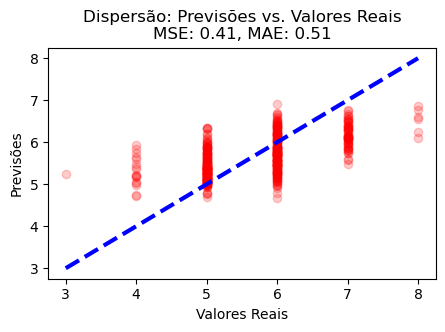

In [285]:
reg_lin(categorics, target)

Score do modelo: 0.54375
Predict do modelo: [5 5 5 5 6 5 5 5 6 6 6 5 5 5 5 6 5 5 6 5 6 5 6 6 5 5 6 5 5 6 5 6 6 5 5 5 6
 6 6 6 5 5 6 5 6 6 6 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 6 5 6 5 6 5 6 5 6 6
 6 5 6 6 6 6 5 6 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 5 5 5 6 6 6 6 5 5 6 5 6
 5 6 5 6 6 6 5 5 6 6 5 5 5 5 5 6 6 5 6 6 5 5 6 6 5 5 5 5 6 5 6 6 6 6 5 6 6
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 6 6 6 5 5 6 6 6 6 5 5 5 5 6 5 5 5 5 6 6 5 5 5 6 6 5 6 6 6 6 5 5 6 5 5 6
 6 6 5 5 5 6 5 5 5 5 6 6 6 6 6 6 5 5 6 5 6 6 6 5 6 5 7 5 6 6 5 5 5 5 6 6 6
 6 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 5 6 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 6 5 5 6 5 5 5 6 6 6 6 6 6 5 5 5 6 5 5 6 5 6 6 5 5 5 5 6 6 5 6 6 6 5
 5 5 6 6 6 5 5 6 6 6 5 5 5 6 5 5 6 5 6 5 5 5 5 5 5 5 6 6 5 6 6 6 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 6 5 6 6 6 5 5 6 6 6 5 5 6 6 6 5 5 6 5 5 6 5 5 6 6
 6 5 5 5 6 6 6 6 6 6 6 6 6 6 5 5 5 5 6 5 5 6 5 6 5 5 5 6 5 5 6 5 6 6 6 6 5
 5 5 5 6 6 6 6 6 6 5 5 6 6 5 6 5 5 5 6 5 6 5 5 5 6 6 6 6

C:\Users\vitor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


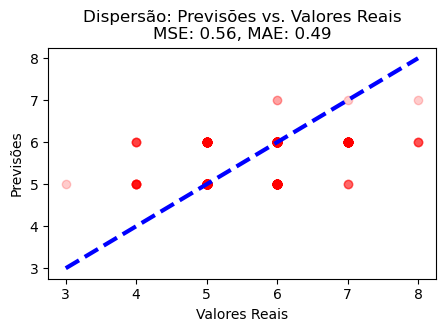

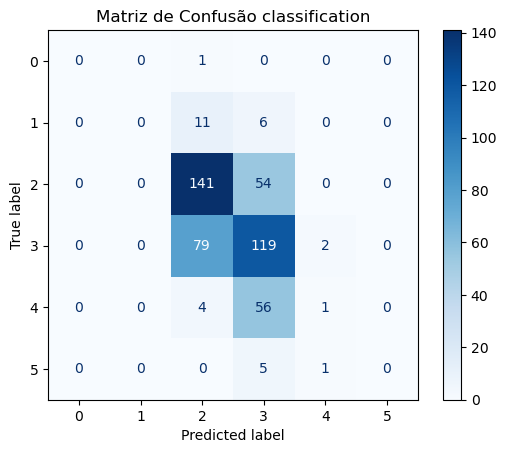

In [286]:
classification(categorics, target)

Score do modelo: 0.65
Predict do modelo: [5 5 5 5 6 5 5 5 6 6 6 5 6 5 5 7 5 6 7 5 5 6 5 6 5 6 6 5 5 6 5 6 6 6 5 5 6
 6 5 7 5 5 6 5 5 6 6 6 5 6 5 5 6 7 5 5 6 6 6 5 6 6 5 5 7 5 7 6 7 5 6 5 6 6
 6 5 7 5 6 7 5 7 5 6 6 6 5 6 6 6 6 6 6 5 5 5 5 6 5 6 5 5 6 6 6 7 6 5 6 5 7
 5 7 5 5 6 6 5 5 6 6 6 6 5 6 5 7 5 5 6 6 5 5 6 6 5 5 5 5 6 7 6 7 6 5 5 6 6
 6 5 6 6 5 5 6 5 6 6 5 6 6 6 7 5 6 6 6 5 5 5 5 5 7 5 7 6 6 5 5 5 5 6 5 6 5
 7 6 6 7 5 5 7 5 6 6 5 5 6 5 7 5 5 6 5 7 5 5 6 6 6 8 5 5 7 7 6 6 5 6 5 6 6
 6 6 6 5 5 7 5 5 5 5 7 6 5 7 5 6 6 5 5 5 6 7 5 7 6 6 6 5 6 5 5 6 6 5 5 6 6
 6 7 6 5 6 6 7 5 5 6 6 5 6 5 6 6 6 6 7 7 6 7 5 5 5 5 7 5 6 5 6 6 7 6 5 5 6
 5 6 6 6 5 5 6 6 6 5 6 6 6 7 6 5 6 5 6 6 5 5 6 5 6 6 6 5 5 5 6 6 5 6 6 7 5
 6 6 6 6 6 5 5 7 7 6 5 6 5 6 5 6 6 6 6 5 6 6 6 5 5 6 5 6 5 5 6 5 6 6 5 5 5
 5 5 6 6 6 7 6 6 5 6 5 6 7 6 6 7 7 5 5 6 5 5 5 6 6 6 6 5 5 6 5 5 6 5 6 6 7
 6 6 5 6 7 6 6 6 6 6 7 6 6 7 5 6 5 6 6 5 5 6 5 7 6 5 5 7 5 5 5 5 6 6 6 6 5
 6 5 5 5 6 5 6 6 5 5 5 6 7 5 6 5 5 6 5 5 6 5 6 6 5 6 7 5 6 

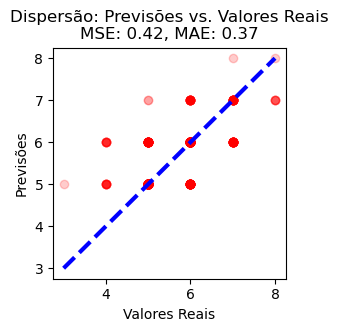

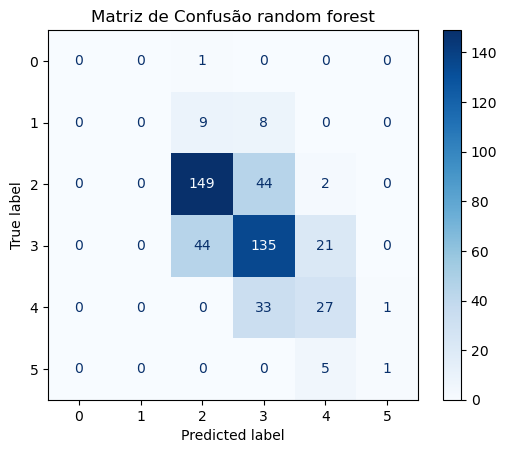

In [287]:
random_forest(categorics, target)

Score do modelo: 0.5625
Predict do modelo: [5 4 5 6 6 5 5 5 5 6 6 5 6 5 6 7 6 5 7 5 5 6 5 6 6 6 6 6 7 6 5 6 6 4 6 5 6
 6 5 6 4 5 6 5 5 5 6 6 5 6 5 5 6 7 5 5 6 5 6 5 7 6 6 5 7 4 6 6 7 5 6 5 6 6
 6 5 6 5 6 7 5 7 5 6 7 7 5 6 8 5 7 5 5 5 6 5 5 6 5 5 5 5 5 6 6 7 7 5 7 5 8
 5 7 5 4 5 6 5 5 6 6 6 7 5 6 5 6 7 5 6 6 5 5 6 6 6 5 6 6 7 7 6 6 4 5 5 6 6
 6 5 6 6 5 5 6 5 6 6 5 6 6 5 7 5 6 6 6 5 6 5 5 5 7 5 7 6 6 5 5 5 5 6 6 6 5
 5 6 6 7 5 6 7 5 6 5 5 5 6 5 7 5 6 5 5 7 5 4 4 6 7 8 5 5 7 7 6 6 5 6 5 5 6
 6 6 5 5 5 7 5 5 6 4 7 6 5 7 5 7 6 5 5 6 6 7 5 7 5 5 7 5 6 5 6 5 6 6 5 4 6
 8 7 5 5 7 5 5 5 5 6 6 5 6 6 6 3 6 5 7 7 6 7 5 5 6 5 7 5 6 6 6 7 7 5 6 5 6
 5 7 6 6 5 5 6 6 6 5 5 6 5 7 5 5 5 6 4 6 5 5 7 5 6 7 6 5 3 5 7 6 5 6 5 7 6
 6 6 6 6 6 6 4 7 7 5 6 6 6 6 5 6 6 5 6 5 6 5 6 5 5 5 5 5 6 5 6 5 6 6 5 5 6
 5 5 6 6 6 6 6 7 5 6 5 6 6 5 5 7 6 5 6 5 5 5 6 6 6 6 5 6 6 6 5 5 4 5 5 6 6
 6 6 5 5 6 6 7 5 6 5 7 6 7 6 5 6 5 6 6 5 5 6 4 7 6 6 5 7 5 6 5 5 6 4 6 7 5
 6 6 5 5 6 5 5 7 7 5 5 5 7 5 5 5 5 4 5 5 6 5 6 6 6 5 7 5 

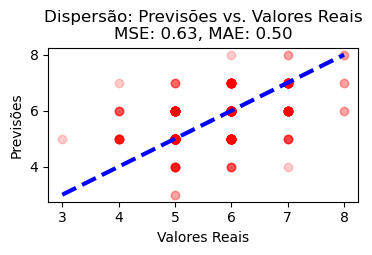

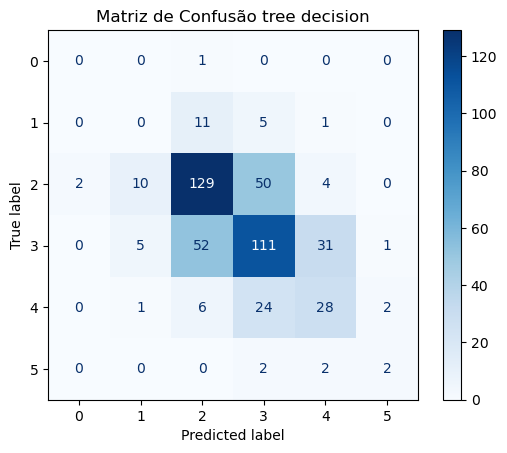

In [288]:
tree_decision(categorics, target)

O modelo teste com maior acurácia foi o de random forest!!

# Criando testes para responder as 10 perguntas!

1.	Qual é a relação entre a acidez fixa e o pH dos vinhos?

In [289]:
data['fixed acidity'].corr(data['pH'])

-0.6829781945685315

Correlação baixa!

2.	Existe alguma correlação significativa entre a quantidade de acidez volátil e o total de dióxido de enxofre?

In [290]:
data['volatile acidity'].corr(data['total sulfur dioxide'])

0.07647000482092828

Existe, porém é tão baixa que se torna insignificante, aconteceu poucas vezes e por acaso.

3.	Os níveis de açúcar residual impactam o nível de cloretos nos vinhos?

Não diretamente, pois, após análises, foi constatado que as duas variáveis não se influenciam.

Entretanto, os sulfatos têm a função de adicionar sódio ao vinho, o que pode parecer palatavelmente maior caso o nível de açúcar seja menor

Porém, quimicamente falando, não, as variáveis não se influenciam

4.	Os vinhos que têm a maior concentração de dióxido de enxofre livre têm o pH afetado?

In [299]:
data[data['free sulfur dioxide']>55]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5


In [304]:
data[data['pH']>3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [337]:
data['free sulfur dioxide'].corr(data['pH'])

0.07037749850494186

Sim, não em quantidades grandes, pois o sulfato não tem correlação alta com o pH, entretando, o sulfato é quimicamente um influenciador do pH, deixando o produto mais ácido

5.	Qual é o intervalo de densidade mais comum nos vinhos?

In [316]:
print(pd.DataFrame(data['density'].value_counts().head(15)))

         count
density       
0.9972      36
0.9968      35
0.9976      35
0.9980      29
0.9962      28
0.9978      26
0.9964      25
0.9994      24
0.9970      24
0.9982      23
0.9966      23
0.9974      22
0.9988      20
0.9984      20
0.9986      19


0.9972, 0.9968 e 0.9976

6.	Existe alguma tendência entre a quantidade de sulfatos e a quantidade de dióxido de enxofre?

In [291]:
data['sulphates'].corr(data['total sulfur dioxide'])

0.04294683623953825

Existe, porém é tão baixa que se torna insignificante

7.	A acidez fixa afeta o nível de açúcar residual em diferentes faixas de vinhos?

In [317]:
data['fixed acidity'].corr(data['residual sugar'])

0.11477672449492135

Não, além da correlação ser baixa, o açúcar não influencia na acidez fixa do produto, mas sim o ácido cítrico e o pH

8.	Quais características têm maior influência na densidade dos vinhos?

Quase todos os químicos adicionados, mas, principalmente e em maioria, o álcool

9.	Qual é o impacto da adição de sulfatos sobre a acidez volátil e a acidez fixa?

Imediatamente, nenhuma. Entretanto é necessário atentar-se com os outros aditivos para observar se não ocorre nenhuma outra alteração por conta de reações químicas não planejadas

10.	Quantos vinhos têm o teor alcoólico maior que 13.5?

In [336]:
data['alcohol'].max()
print(f"São {len(data[data['alcohol']>13.5])} vinhos!")

São 13 vinhos!


13 vinhos